# Matplotlib Practice

## AirBnB Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

100%|██████████| 2.44M/2.44M [00:00<00:00, 2.93MB/s]

Extracting files...


Path to dataset files: C:\Users\skyfree\.cache\kagglehub\datasets\dgomonov\new-york-city-airbnb-open-data\versions\3


In [2]:
# Move the dataset
import os, shutil

files = os.listdir(path)

shutil.move(f'{path}/{files[0]}', "../Data/Datasets/airBnB.csv")

'../Data/Datasets/airBnB.csv'

## Load and Explore Dataset

In [3]:
import pandas as pd

file_loc = "../Data/Datasets/airBnB.csv"
df = pd.read_csv(file_loc)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Clean Dataset

In [8]:
## Missing Values

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Handle Missing Values
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mean(), inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

C:\Users\skyfree\AppData\Local\Temp\ipykernel_18376\1167343453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
C:\Users\skyfree\AppData\Local\Temp\ipykernel_18376\1167343453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [14]:
df.shape

(38821, 16)

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

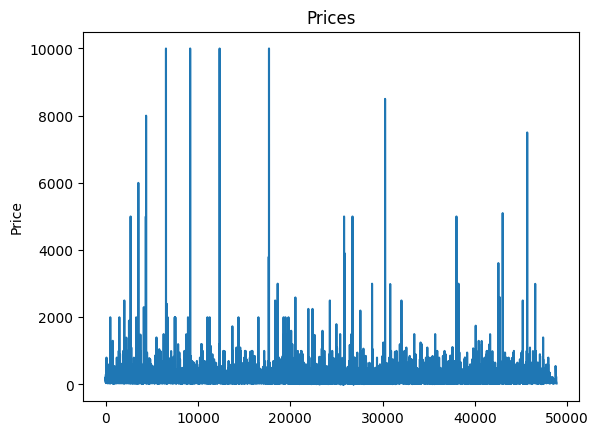

In [17]:
## Price
df['price'].plot()
plt.ylabel('Price')
plt.title('Prices')
plt.show()

Text(0.5, 1.0, 'Price vs Reviews')

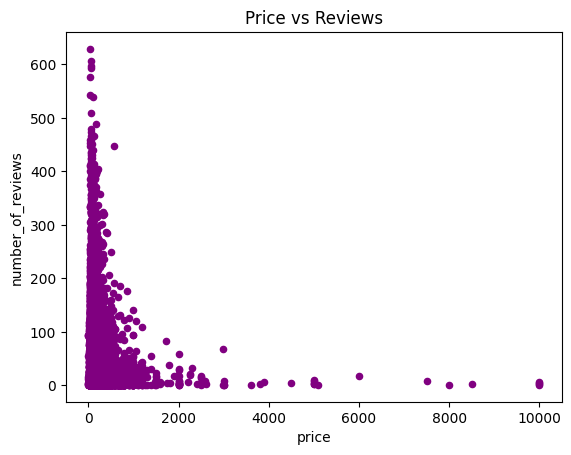

In [19]:
## Plot scatter
df.plot(kind='scatter', x='price', y='number_of_reviews', color = 'purple')
plt.title('Price vs Reviews')

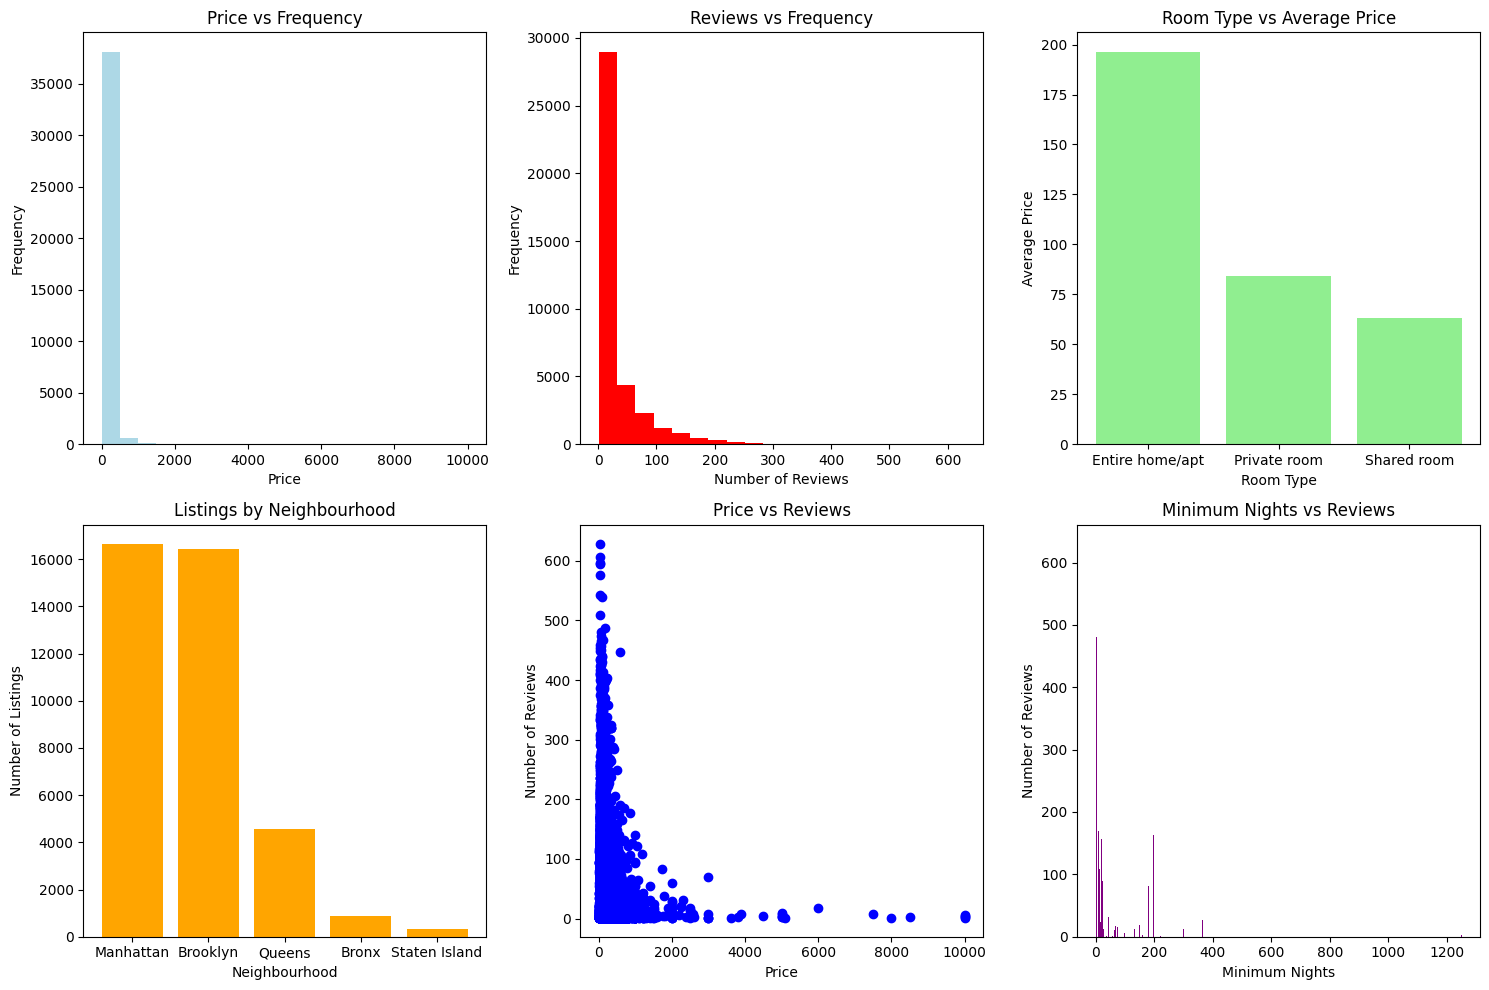

In [39]:
## Subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

## Price vs Freq
axs[0, 0].hist(df['price'], bins=20, color='lightblue')
axs[0, 0].set_title('Price vs Frequency')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

## Reviews vs Freq
axs[0, 1].hist(df['number_of_reviews'], bins=20, color='red')
axs[0, 1].set_title('Reviews vs Frequency')
axs[0, 1].set_xlabel('Number of Reviews')
axs[0, 1].set_ylabel('Frequency')

## Group by type of room and show average price
room_type = df.groupby(['room_type'])['price'].mean().reset_index()
axs[0, 2].bar(room_type['room_type'], room_type['price'], color='lightgreen')
axs[0, 2].set_title('Room Type vs Average Price')
axs[0, 2].set_xlabel('Room Type')
axs[0, 2].set_ylabel('Average Price')

## Number of listings in each borough (NYC)
neighbourhoods = df['neighbourhood_group'].value_counts().reset_index()
neighbourhoods.columns=['neighbourhood_group', 'count']
axs[1, 0].bar(neighbourhoods['neighbourhood_group'], neighbourhoods['count'], color ='orange')
axs[1, 0].set_title('Listings by Neighbourhood')
axs[1, 0].set_xlabel('Neighbourhood')
axs[1, 0].set_ylabel('Number of Listings')

## Price vs Number of Reviews
axs[1, 1].scatter(df['price'], df['number_of_reviews'], color = 'blue')
axs[1, 1].set_title('Price vs Reviews')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Number of Reviews')

## Minimum Nights vs Reviews
min_nights = df.groupby(['minimum_nights'])['number_of_reviews'].max().reset_index()
axs[1, 2].bar(min_nights['minimum_nights'], min_nights['number_of_reviews'], color = 'purple')
axs[1, 2].set_title('Minimum Nights vs Reviews')
axs[1, 2].set_xlabel('Minimum Nights')
axs[1, 2].set_ylabel('Number of Reviews')

plt.tight_layout()

plt.show()